# 주제 : 롤 좀 하니? '이것'만 하면 무조건 이긴다!<br> - 데이터로 알아보는 리그 오브 레전드의 승리 공식
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 League of Legends Diamond Ranked Games (10 min) 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    high_diamond_ranked_10min.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gameId: 게임 판의 고유 ID
    blueWins: 블루팀의 승리 여부 (0: 패배, 1: 승리)
    xxxWardsPlaced: xxx팀에서 설치한 와드의 수 
    xxxWardsDestroyed: xxx팀에서 파괴한 와드의 수
    xxxFirstBlood: xxx팀의 첫번째 킬 달성 여부
    xxxKills: xxx팀의 킬 수
    xxxDeaths: xxx팀의 죽음 수
    xxxAssists: xxx팀의 어시스트 수
    xxxEliteMonsters: xxx팀이 죽인 엘리트 몬스터 수
    xxxDragons: xxx팀이 죽인 용의 수
    xxxHeralds: xxx팀이 죽인 전령의 수
    xxxTowersDestroyed: xxx팀이 파괴한 탑의 수
    xxxTotalGold: xxx팀의 전체 획득 골드
    xxxAvgLevel: xxx팀의 평균 레벨
    xxxTotalExperience: xxx팀의 총 경험치 획득량
    xxxTotalMinionsKilled: xxx팀의 총 미니언 킬 수
    xxxTotalJungleMinionsKilled: xxx팀의 총 정글 미니언 킬 수
    xxxGoldDiff: xxx팀과 다른 팀 간의 골드 획득량 차이
    xxxExperienceDiff: xxx팀과 다른 팀과의 경험치 획득량 차이
    xxxCSPerMin: xxx팀의 분당 CS 스코어
    xxxGoldPerMin: xxx팀의 분당 골드 획득량
      
    
    
- 데이터 출처: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

## 최종 목표
    - 일상에서 볼 수 있는 데이터의 활용
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로부터 인사이트 습득 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 리그 오브 레전드 데이터셋

### E-스포츠와 리그 오브 레전드


### 리그 오브 레전드 데이터셋에 관하여


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'kimhagdori'
os.environ['KAGGLE_KEY'] = '5f09cbd68873b51cb127ca6c2daa552d'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

# !kaggle datasets download -d bobbyscience/league-of-legends-diamond-ranked-games-10-min
# !unzip '*.zip'

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('./high_diamond_ranked_10min.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [6]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())


print('DATA HEAD')
display(df.head())

print('DATA INFO')
display(df.info())

print('DATA DESCRIBE')
display(df.describe())

DATA HEAD


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64 

None

DATA DESCRIBE


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


### 문제 5. 각 컬럼의 Correlation 히트맵으로 시각화하기


In [37]:
df.corr()

# 정확히 반대가 되는 컬럼들 1 -> -1
# bluekills와 reddeaths 관계! 둘중 하나만 필요해

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,...,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871


<AxesSubplot:>

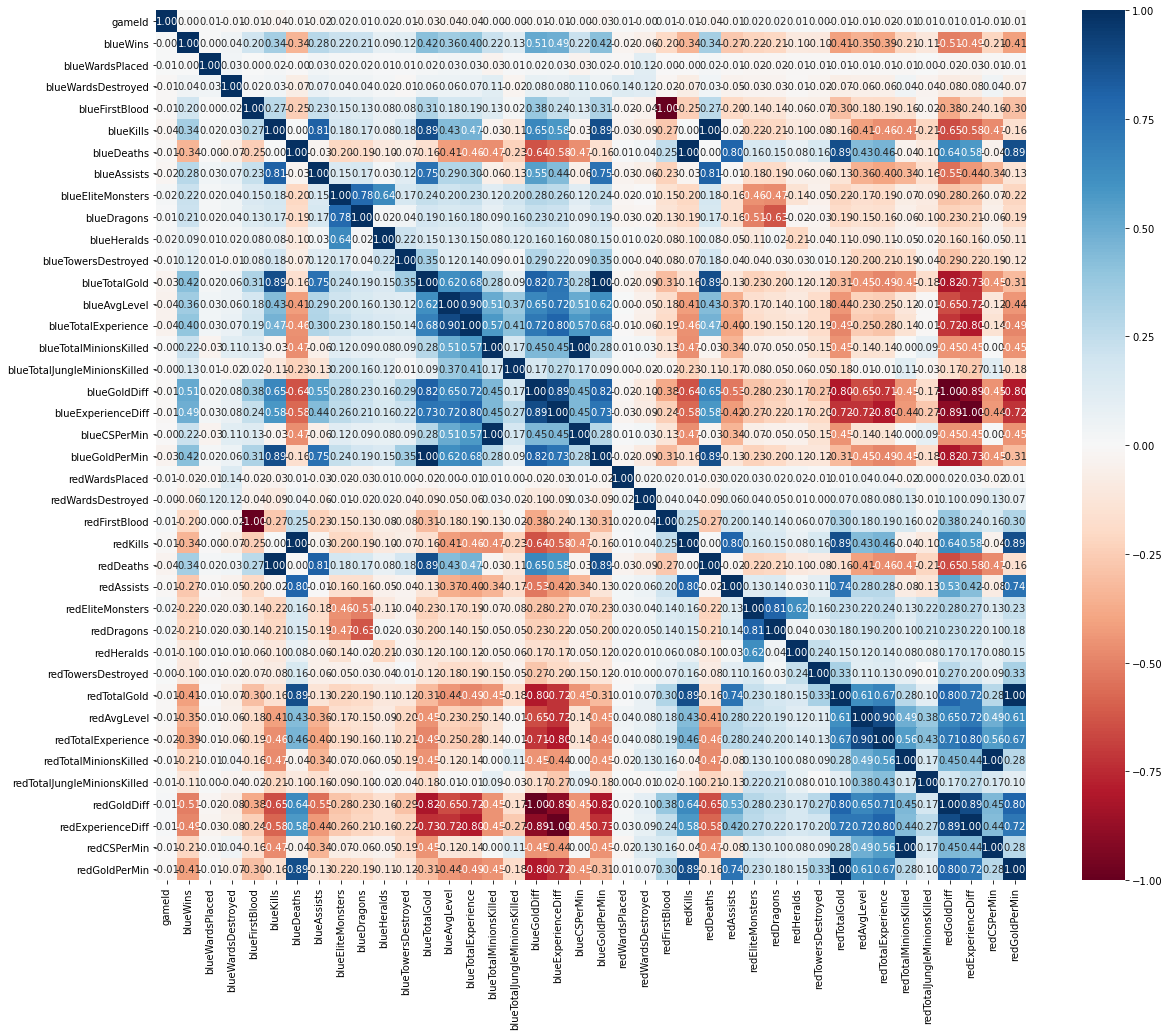

In [7]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기

plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu', square=True)


<AxesSubplot:>

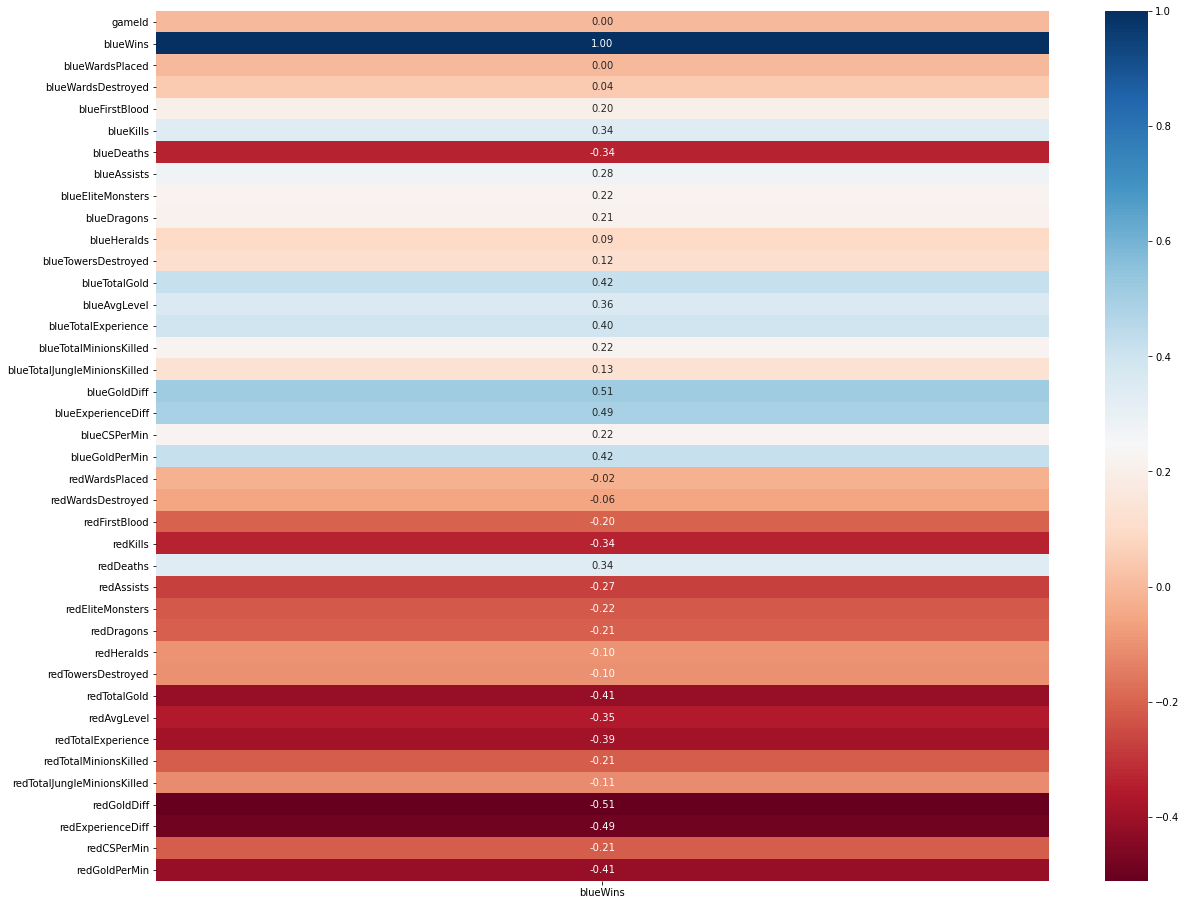

In [36]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기

plt.figure(figsize=(20, 16))
sns.heatmap(df.corr()[['blueWins']], annot=True, fmt='.2f', cmap='RdBu')


### 문제 6. 각 컬럼과 승리 여부의 관계 시각화하기


<AxesSubplot:xlabel='blueGoldDiff', ylabel='Count'>

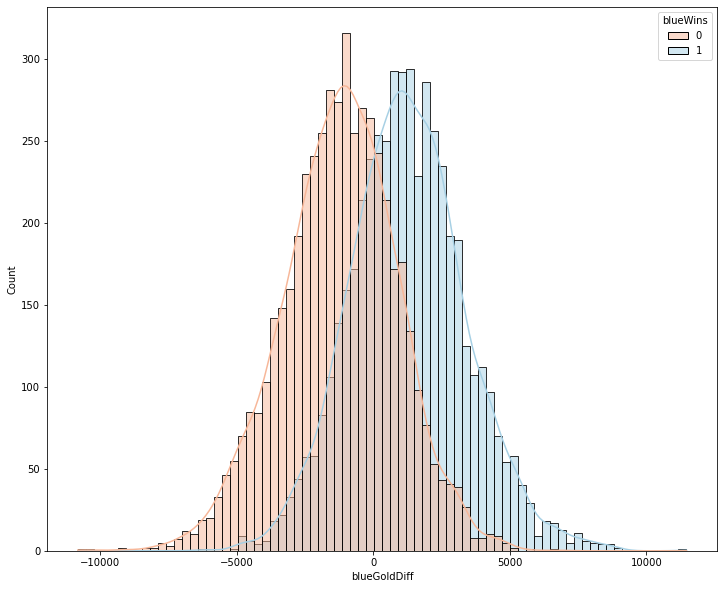

In [39]:
# Seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 승/패의 관계를 시각화

# 골드 획득 차이가 클수록 이길확률 높아짐
plt.rcParams['figure.figsize'] = (12, 10)

sns.histplot(x='blueGoldDiff', hue='blueWins', data=df, kde=True, palette='RdBu')

<AxesSubplot:xlabel='blueKills', ylabel='Count'>

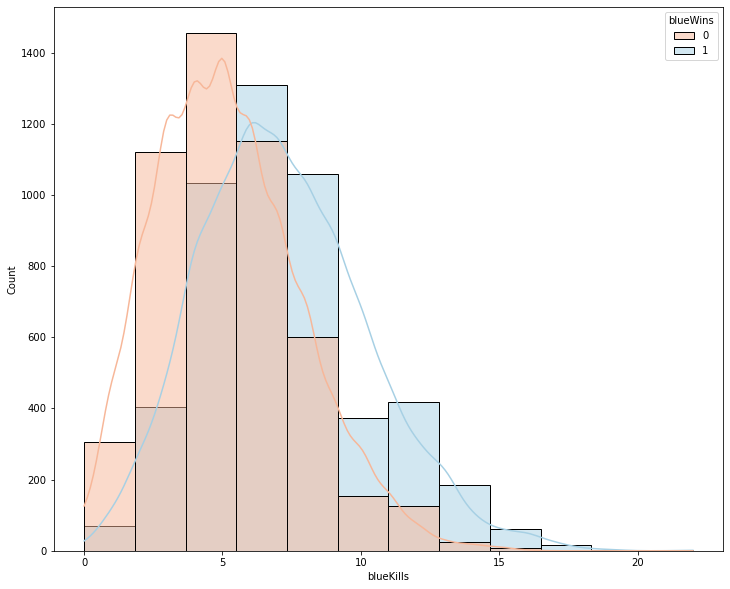

In [41]:
# Seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 승/패의 관계를 시각화

# 골드 획득 차이가 클수록 이길확률 높아짐
plt.rcParams['figure.figsize'] = (12, 10)

sns.histplot(x='blueKills', hue='blueWins', data=df, kde=True, palette='RdBu', bins=12)

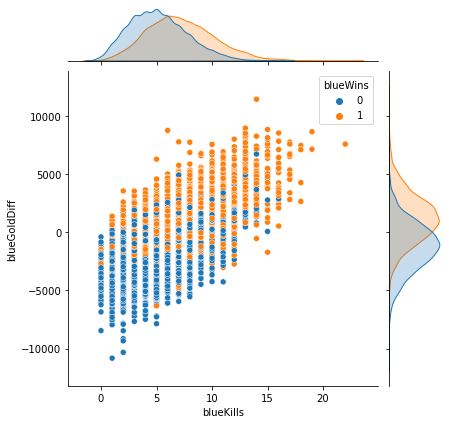

In [42]:
sns.jointplot(x='blueKills', y='blueGoldDiff', data=df, hue='blueWins')

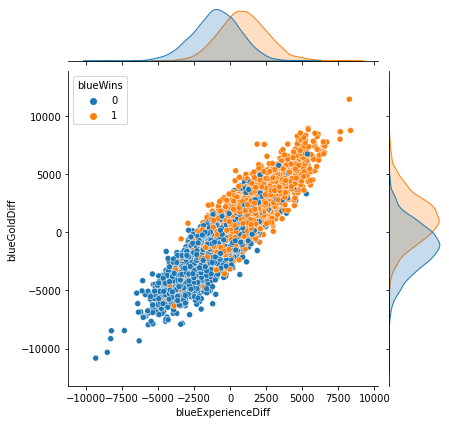

In [43]:
## 상관성 많이 높음

sns.jointplot(x='blueExperienceDiff', y='blueGoldDiff', data=df, hue='blueWins')

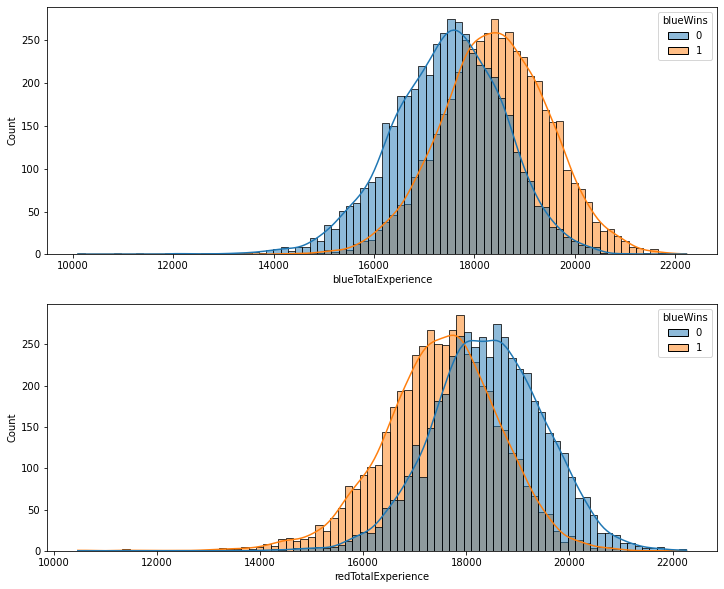

In [8]:
# Seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 승/패의 관계를 시각화

# 경험치 -> 높으면 이길 확률 높음
plt.rcParams['figure.figsize'] = (12, 10)
fig, ax = plt.subplots(2, 1, sharex=False, sharey=False)
sns.histplot(x='blueTotalExperience', hue='blueWins', data=df, kde=True, ax=ax[0])


sns.histplot(x='redTotalExperience', hue='blueWins', data=df, kde=True, ax=ax[1])

plt.show()

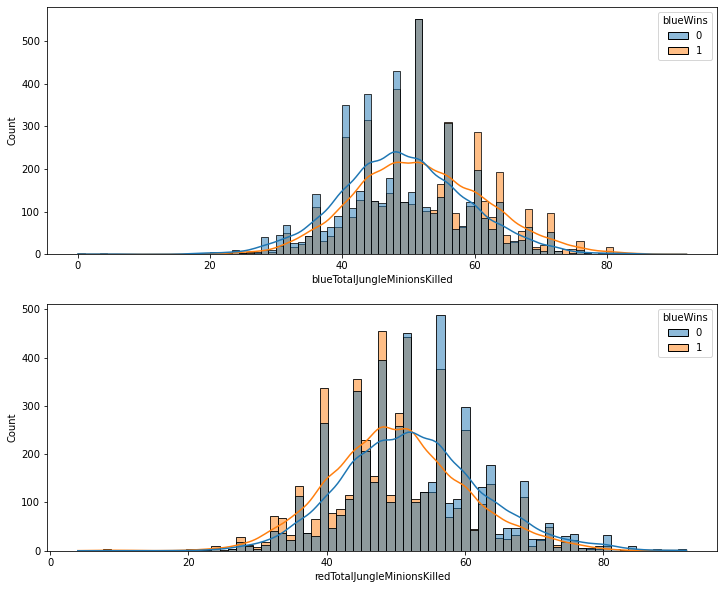

In [9]:
# Seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 승/패의 관계를 시각화

# blue가 이겼어 -> 블루정글씨에스가 많으면 이길확률 아주 약간 높나? 별차이없어보임

plt.rcParams['figure.figsize'] = (12, 10)
fig, ax = plt.subplots(2, 1, sharex=False, sharey=False)
sns.histplot(x='blueTotalJungleMinionsKilled', hue='blueWins', data=df, kde=True, ax=ax[0], hue_order=[0, 1])


sns.histplot(x='redTotalJungleMinionsKilled', hue='blueWins', data=df, kde=True, ax=ax[1], hue_order=[0, 1])

plt.show()

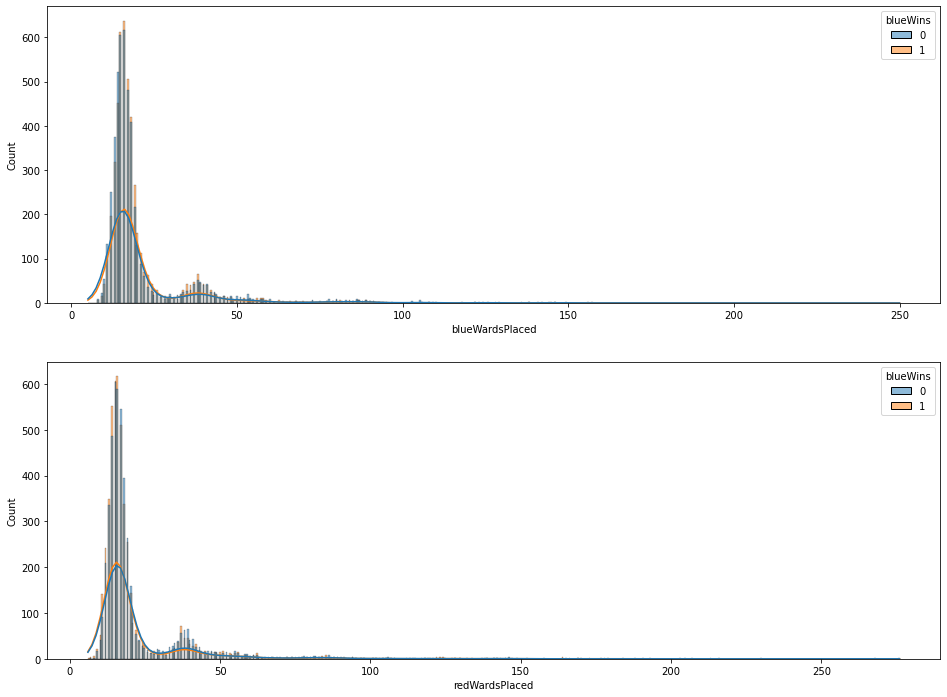

In [10]:
# Seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 승/패의 관계를 시각화

# 설치한 와드 수 별차이 없음

plt.rcParams['figure.figsize'] = (16, 12)
fig, ax = plt.subplots(2, 1, sharex=False, sharey=False)
sns.histplot(x='blueWardsPlaced', hue='blueWins', data=df, kde=True, ax=ax[0], hue_order=[0, 1])


sns.histplot(x='redWardsPlaced', hue='blueWins', data=df, kde=True, ax=ax[1], hue_order=[0, 1])

plt.show()

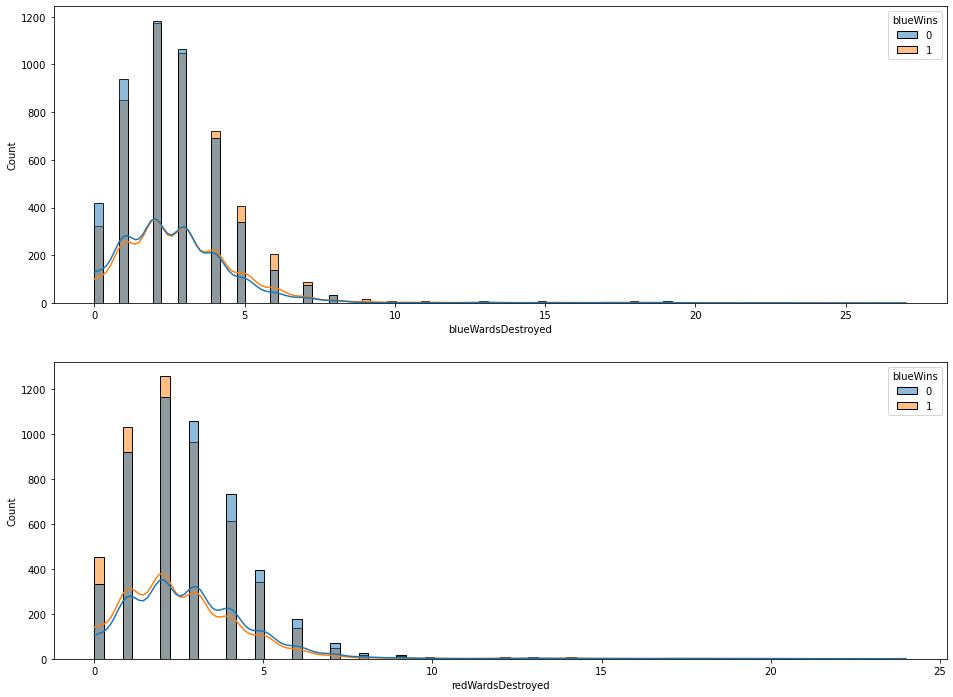

In [11]:
# Seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 승/패의 관계를 시각화

# 와드파괴 수 약간 차이 보이네 (와드 잘 없애줘야해)

plt.rcParams['figure.figsize'] = (16, 12)
fig, ax = plt.subplots(2, 1, sharex=False, sharey=False)
sns.histplot(x='blueWardsDestroyed', hue='blueWins', data=df, kde=True, ax=ax[0], hue_order=[0, 1])


sns.histplot(x='redWardsDestroyed', hue='blueWins', data=df, kde=True, ax=ax[1], hue_order=[0, 1])

plt.show()

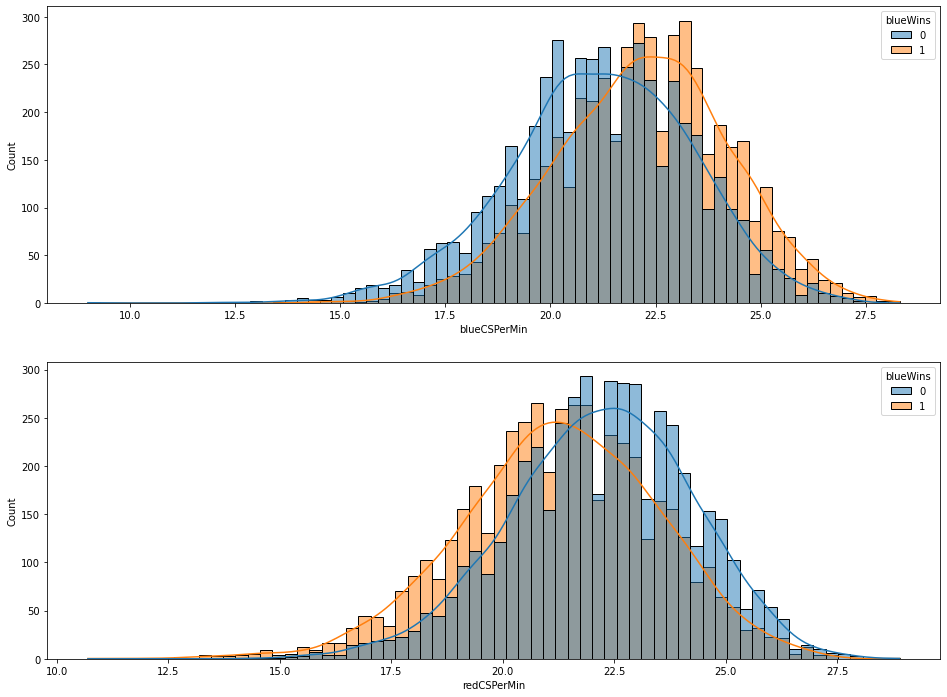

In [12]:
# Seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 승/패의 관계를 시각화

# 분당 cs 많을수록 이길 확률 높네

plt.rcParams['figure.figsize'] = (16, 12)
fig, ax = plt.subplots(2, 1, sharex=False, sharey=False)
sns.histplot(x='blueCSPerMin', hue='blueWins', data=df, kde=True, ax=ax[0], hue_order=[0, 1])


sns.histplot(x='redCSPerMin', hue='blueWins', data=df, kde=True, ax=ax[1], hue_order=[0, 1])

plt.show()

In [46]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

<AxesSubplot:xlabel='redDragons', ylabel='count'>

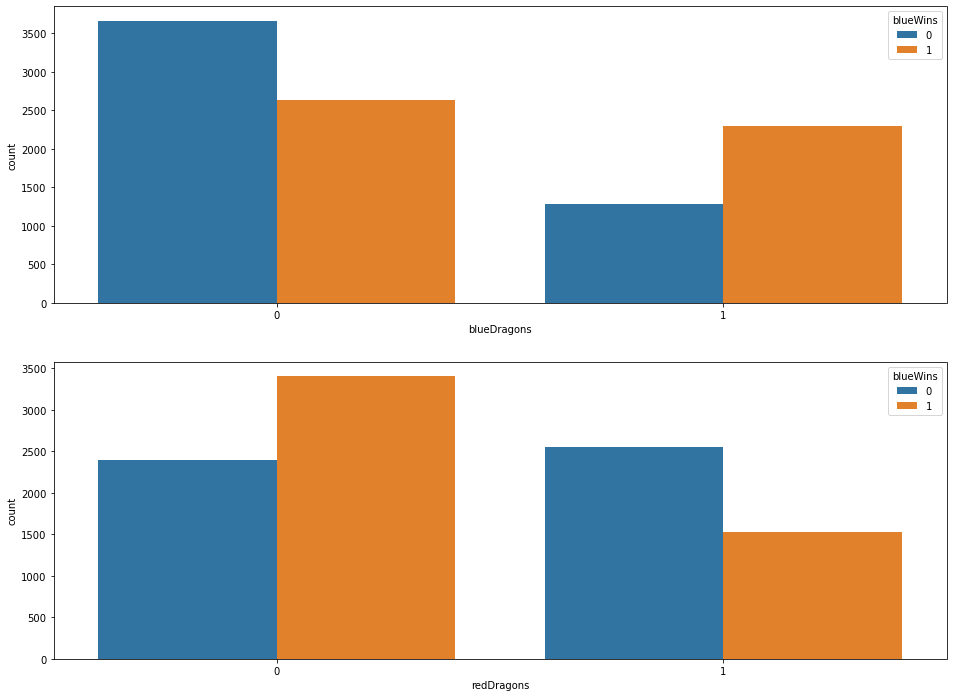

In [49]:
# 블루 첫 드레곤을 먹은 팀이 이길 확률이 좀더 높네
# 레드 / 블루 비대칭적임 
# 레드가 용먹기가 더 유리한가? => 블루가 먹으면 블루가 레드보다 더 커있어서 이런 차이가 있는건가 ?

plt.rcParams['figure.figsize'] = (16, 12)
fig, ax = plt.subplots(2, 1, sharex=False, sharey=False)
sns.countplot(x='blueDragons', hue='blueWins', data=df, ax=ax[0])
sns.countplot(x='redDragons', hue='blueWins', data=df, ax=ax[1])

<AxesSubplot:xlabel='redFirstBlood', ylabel='count'>

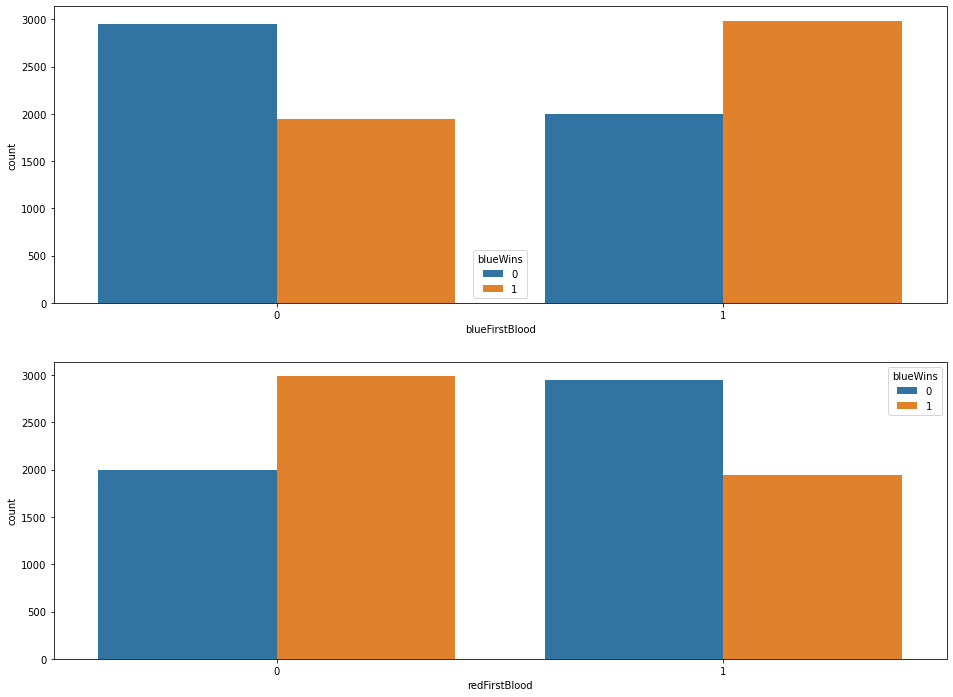

In [51]:
# 퍼블
# 거의 대칭이네
# 퍼블따면 이길확률 좀 더 높은듯

plt.rcParams['figure.figsize'] = (16, 12)
fig, ax = plt.subplots(2, 1, sharex=False, sharey=False)
sns.countplot(x='blueFirstBlood', hue='blueWins', data=df, ax=ax[0])
sns.countplot(x='redFirstBlood', hue='blueWins', data=df, ax=ax[1])

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용해 수치형 데이터 표준화하기


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [14]:
from sklearn.preprocessing import StandardScaler

In [54]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [61]:
df = pd.read_csv('./high_diamond_ranked_10min.csv')

In [62]:
df.drop(['gameId', 'redFirstBlood', 'redKills', 'redDeaths',
       'redTotalGold', 'redTotalExperience','redGoldDiff',
       'redExperienceDiff'], axis=1, inplace=True)

df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [64]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

select_cols = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin']

X_num = df[select_cols]
X_num = pd.DataFrame(scaler.fit_transform(X_num), columns=select_cols)
X_cat = pd.get_dummies(df[['blueDragons', 'blueHeralds', 'redDragons', 'redHeralds', 'blueFirstBlood']], drop_first=True)
X = pd.concat([X_num, X_cat], axis=1)
y = df['blueWins']

In [67]:
X.head()

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,...,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueDragons,blueHeralds,redDragons,redHeralds,blueFirstBlood
0,0.316996,-0.379275,0.935301,-0.046926,1.071495,-0.879231,-0.210439,0.460179,-1.035635,-0.740639,...,-0.410475,-0.928741,0.367685,-0.928741,0.052293,0,0,0,0,1
1,-0.570992,-0.839069,-0.393216,-0.387796,-0.404768,-0.879231,-0.210439,-1.166792,-1.035635,-1.385391,...,-0.410475,1.033784,0.068504,1.033784,0.758619,0,0,1,1,0
2,-0.404494,-1.298863,0.271042,1.657424,-0.650812,0.719503,-0.210439,-0.254307,-1.691092,-1.422043,...,-0.410475,-0.654900,-2.324944,-0.654900,0.533909,1,0,0,0,0
3,1.149484,-0.839069,-0.725346,-0.387796,-0.404768,0.719503,-0.210439,-0.876959,0.275280,0.021567,...,0.244627,0.805583,-0.430131,0.805583,-0.007406,0,1,0,0,0
4,2.925460,0.540312,-0.061087,-0.046926,-0.158724,-0.879231,-0.210439,-0.067382,0.275280,0.512211,...,0.244627,0.349182,1.564408,0.349182,0.613731,0,0,1,0,0


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [68]:
from sklearn.model_selection import train_test_split

In [82]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(f'X_train : {X_train.shape}\nX_test : {X_test.shape}')

X_train : (6915, 31)
X_test : (2964, 31)


## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

model_lr.score(X_test, y_test)

0.7422402159244265

### 문제 10. 모델 학습 결과 평가하기


In [85]:
from sklearn.metrics import classification_report

In [86]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



### 문제 11. XGBoost 모델 생성/학습하기


In [87]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [96]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

model_xgb.score(X_test, y_test)

0.7223346828609987

In [97]:
model_xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)>

In [98]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1469
           1       0.72      0.73      0.73      1495

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



In [90]:
param_grid = {
    'gamma' : [0.01, 0.1, 0.5, 1],
    'max_depth' : [4, 8, 12]
}
model_xgb = XGBClassifier()
model_xgb_grid = GridSearchCV(model_xgb, param_grid=param_grid, cv=3)

model_xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [91]:
model_xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### 문제 12. 모델 학습 결과 평가하기


In [92]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb_grid.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1469
           1       0.73      0.72      0.73      1495

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



## Step5 모델 학습 결과 심화 분석하기


### 문제 13. Logistic Regression 모델 계수로 상관성 파악하기

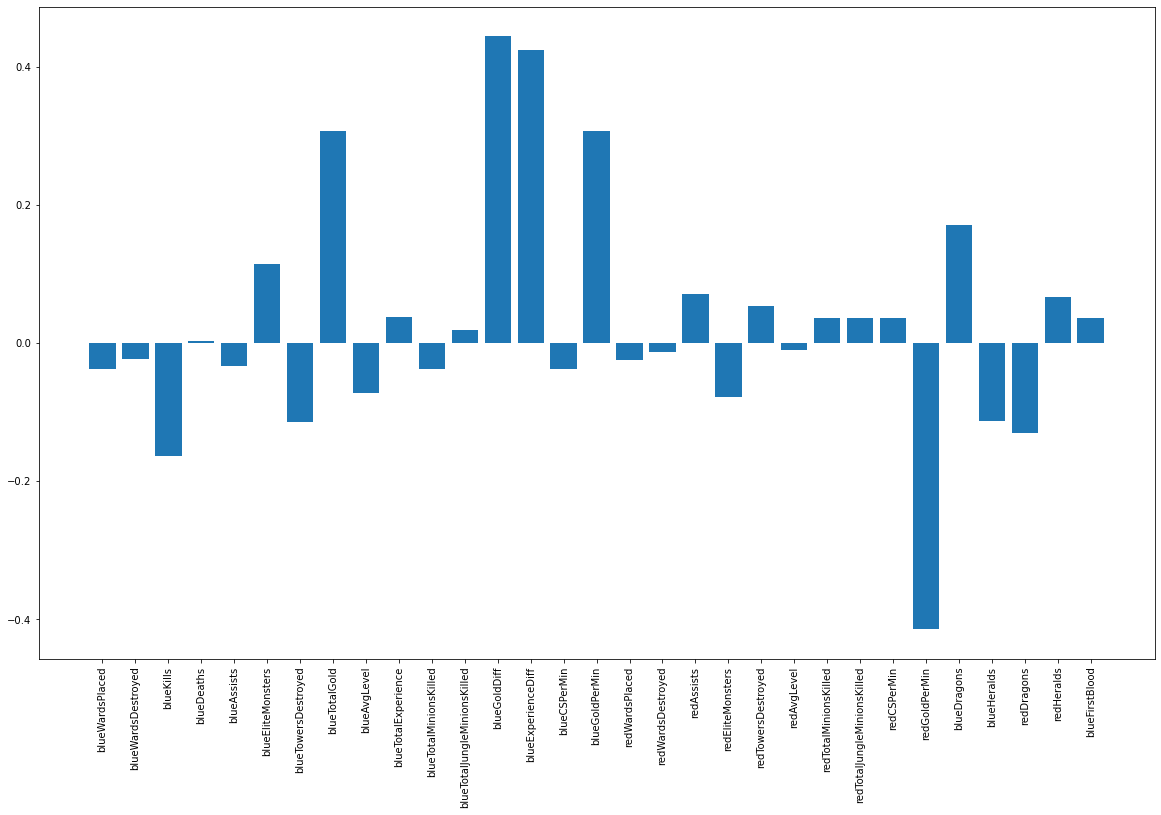

In [93]:
plt.figure(figsize=(20, 12))
plt.bar(X.columns, np.squeeze(model_lr.coef_))
plt.xticks(rotation=90)
plt.show()

### 문제 14. XGBoost 모델로 특징의 중요도 확인하기

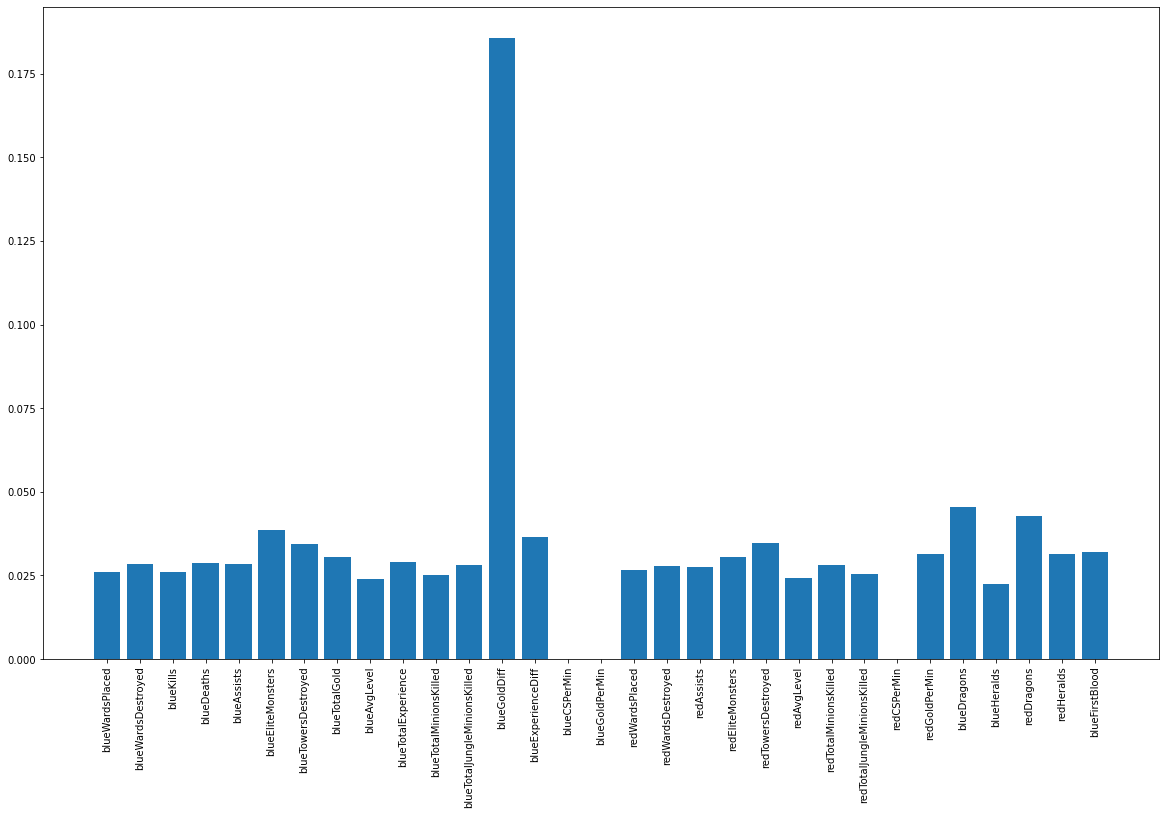

In [99]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
plt.figure(figsize=(20, 12))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()